# Book Cliffs Bandits
### Tom Creech and Jesse Pisel - Geohack 2018 Salt Lake City

**Goal:**

* Sequence Stratigraphic correlations
* Pick Sequences from .las files
* Train a model on the features of each sequence, to find like sequences

For this project we were interested in using machine learning to automate well-to-well sequence stratigraphic correlation. We started by looking at open-source well data in the Piceance Basin. What we quickly discovered was that a lot of the data was still in raster format, or had no formation tops picked throughout the basin.

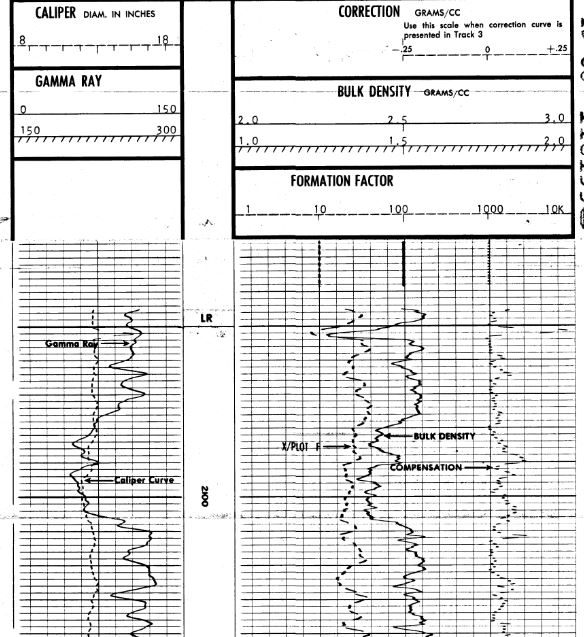

In [11]:
from IPython.display import display, Image
display(Image(filename=r'D:/geohack/images/co_log.jpg'))

Obviously this makes things much harder to work with, so we searched for a different data source. We settled on the data from the USGS that came from the North Slope of Alaska. The data includes well logs for 40 different wells scattered across the North Slope, and sporadic formation top picks present in 14 wells. However, not all formations were picked in all the wells, so the data is missing consistent picks in the wells

# Data

**This Dataset:**

* Alaska North Slope Open Dataset
* .las files (digital)
* Published cross sections and tables (print, 1970’s-1990’s)


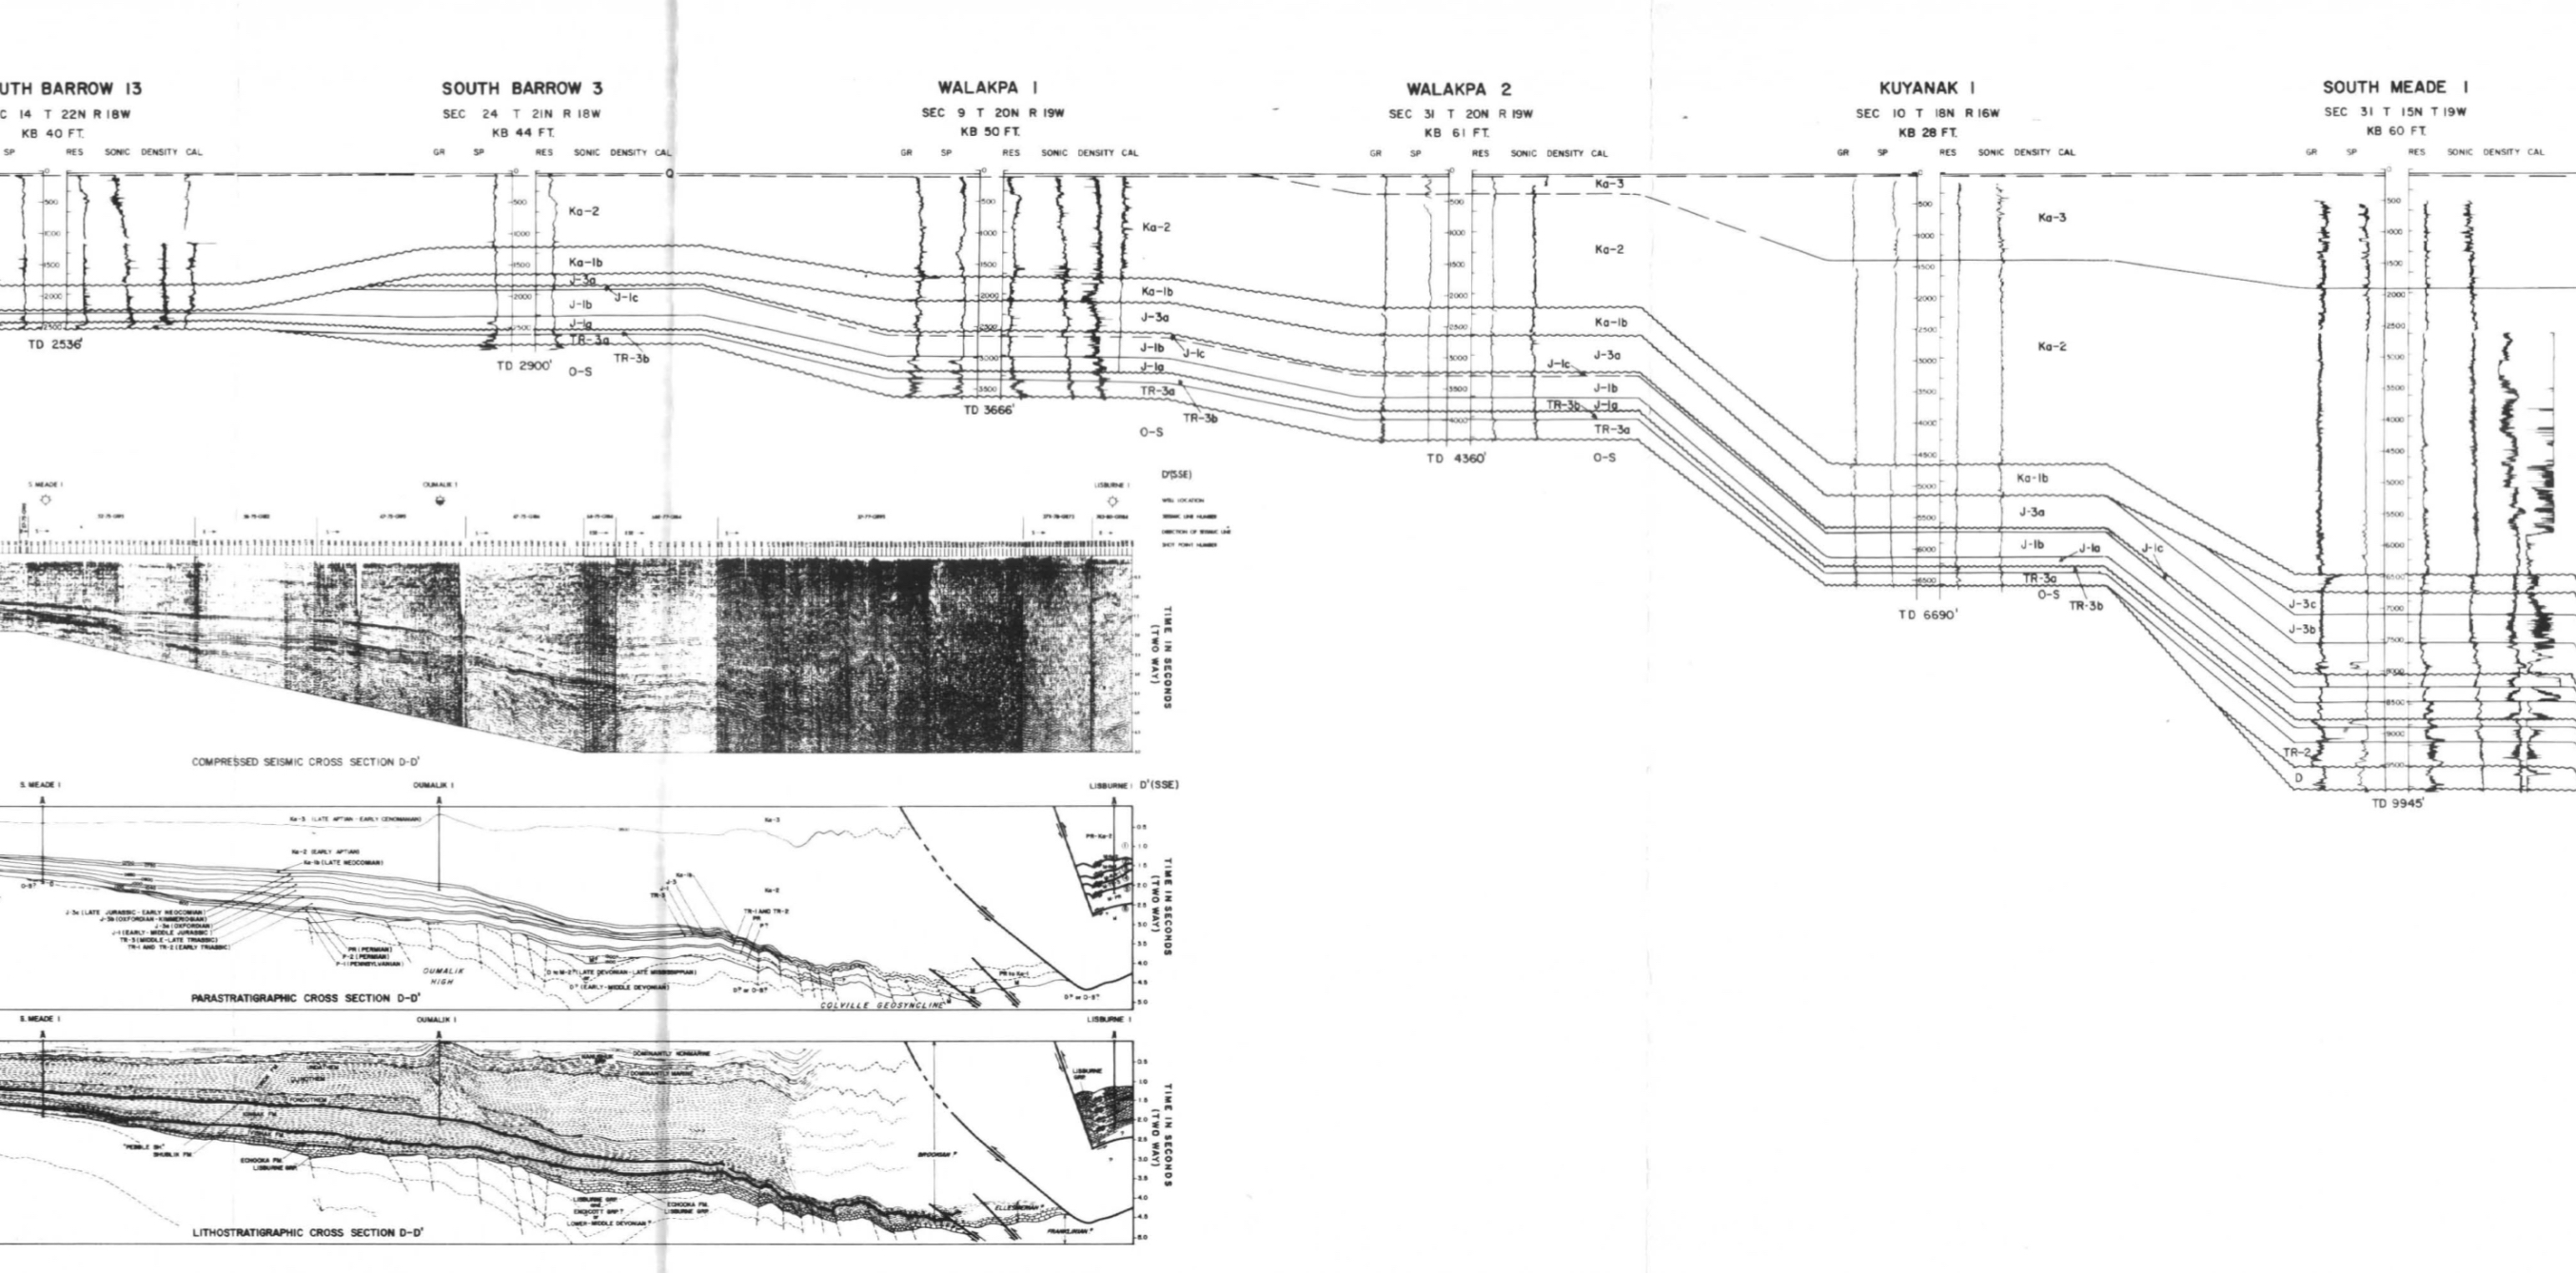

In [10]:
display(Image(filename='D:/geohack/images/IMG_0168.png'))

Because of the data constraints we began looking into ways that we could create consistent formation picks that could be used to build a training dataset. We began looking into Bayesian changepoint detection and found a resource that we could use on [GitHub](https://github.com/hildensia/bayesian_changepoint_detection). Next, we started tweaking hyperparameters in the model to see how the picked top locations would respond.

# Results

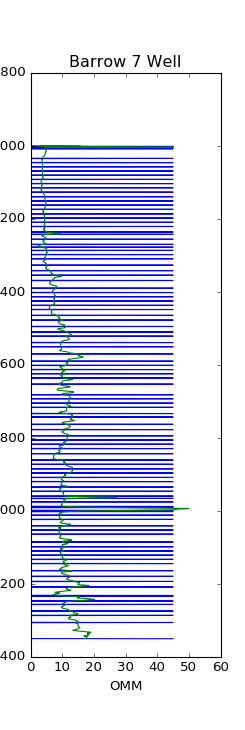

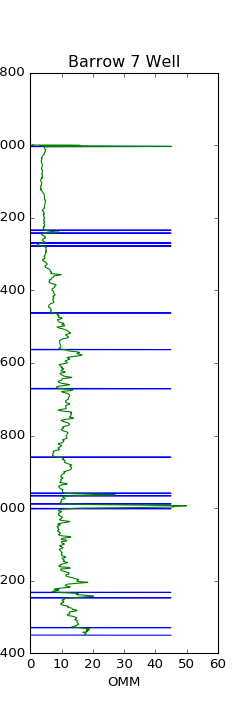

In [14]:
display(Image(filename='D:/geohack/images/splitter.png'))
display(Image(filename='D:/geohack/images/lumper.png'))
#this is the results from tuning the 'lumper/splitter' hyperparameter

Building the training set:

1. Bayesian change detection with memory of priors
2. Probability thresholding = the “lumper v. splitter knob”
3. The tops define zones within the log
4. Define the feature space for each zone in each log (as training data)
  1. Feature conditioning - to build additional representations of the data one might expect to occur (geologically), but which isn’t explicitly represented in the training data.
    1. Scalar - gain/mute log response
    2. Filter, smooth, whiten - variable tool resolution
  2. Descriptive statistics of the log response in each log, each zone
    1. P10, P25, P50, P75, P90, skewness, kurtosis, …
    2. Frequency component (sparse signal)
  3. Feature recombination, possibly GR and Freq to discriminate thin interbeds (clay v. quartz) ...
  4. Can we get away with skipping past lithology prediction, and run with the log responses?
    1. If yes, party down.
    2. Else, add facies (new data) to the feature space.  Represent as probability distribution (categorical variable).


After settling on what we thought were reasonable parameters for picking the formation tops, we set the model loose on 6 of our 40 wells to see what would happen. What we found was that for set parameters it does an ok job of picking intervals in the well logs. However, it is not consistently picking the same locations for all the wells.

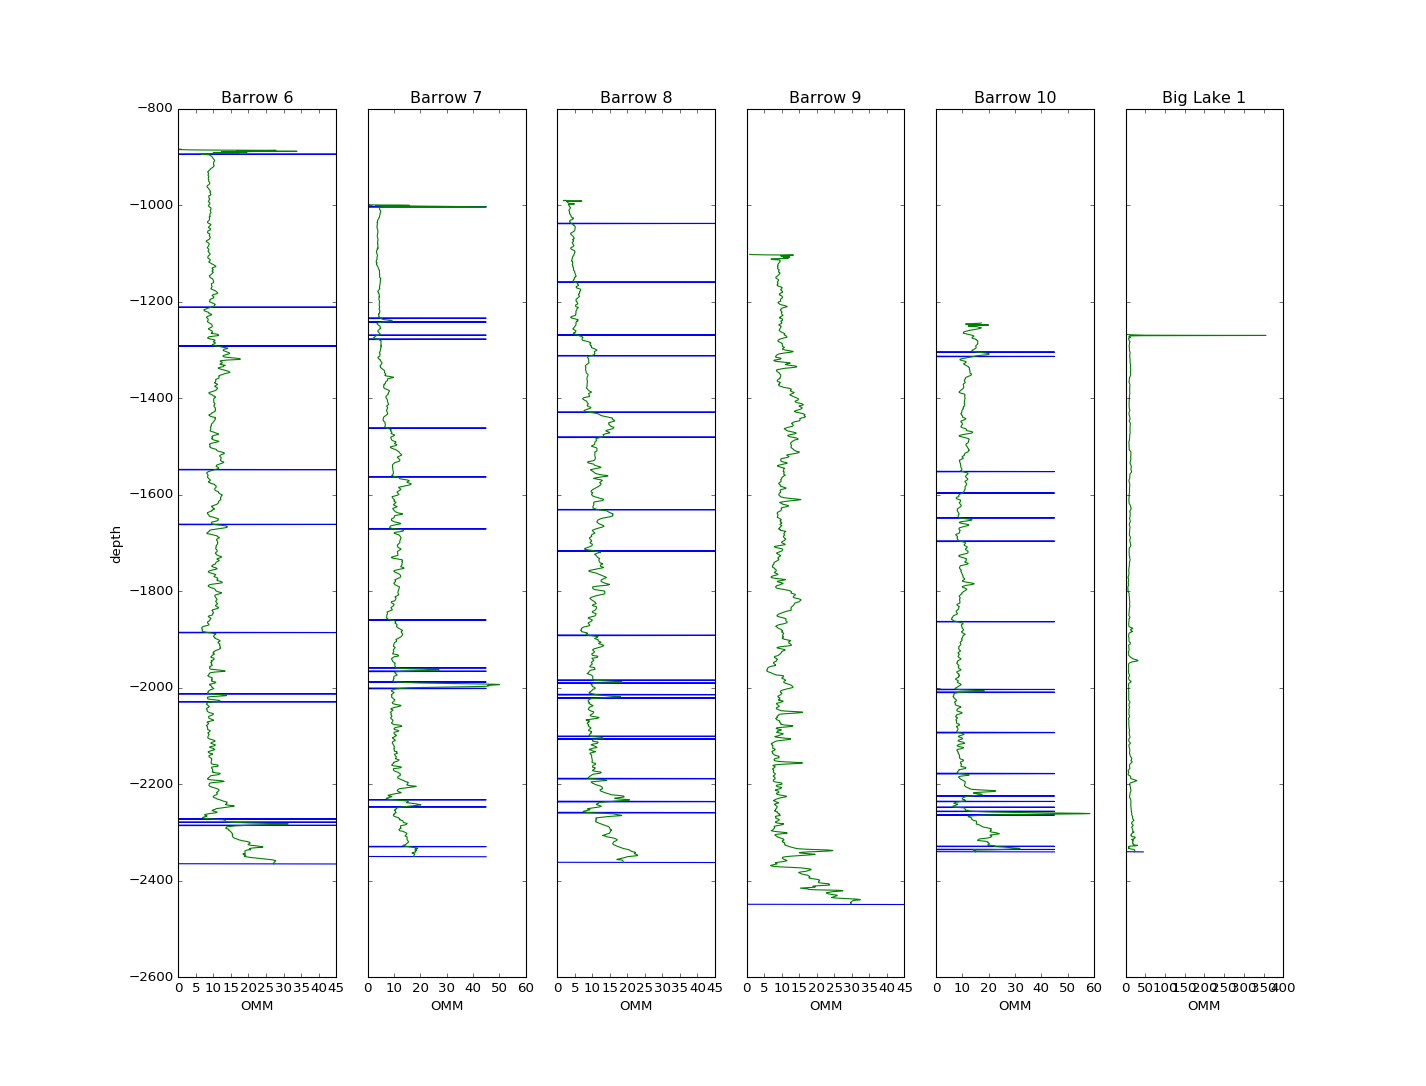

In [15]:
display(Image(filename='D:/geohack/images/all wells.png'))

Future ideas for automatically picking tops include comparing number and location of automatic formation tops with the tops picked by a human interpreter, and minimizing the error between the predicted and actual tops.

**Next steps:**

1. Continue building out the training data feature space
2. Train a model
  1. Conceptually we are framing the problem similar to the use of Q-Q plots
  2. Distribution of features that represent the sequence stratigraphic interval
  3. Gradient descent optimization within the feature space
  4. Because the feature space is so complex, and subtleties in the data will be important to predictive power, we’re considering the use of multiclass cross-entropy loss functions in pytorch.
3. Stretch goals
  1. Cognisance of beds above and below
  2. Labeling/preservation of stratigraphic order


# What We Learned

* Open-source geoscience data is dirty
* Open-source geoscience data is often incomplete
* Sometimes it is easier to automatically pick tops than try and extract data from 'vintage' reports
* Picking sequence tops has the potential to be expedited with changepoint prediction and ML
* Time is an ally and enemy at subhack 